### Using K-Means clustering to determine the optimal number of clusters

#### Submitted BY : Swapnil Mishra

In [43]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
# Load the iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
df.shape

(150, 4)

In [24]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [25]:
# checking for null values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [28]:
# checking statistical description
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Data Visualization

C:\Users\Swapnil Mishra\AppData\Local\Temp\ipykernel_18728\3576983945.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(x ='species',y = 'sepal_length',data = iris, palette=colors)


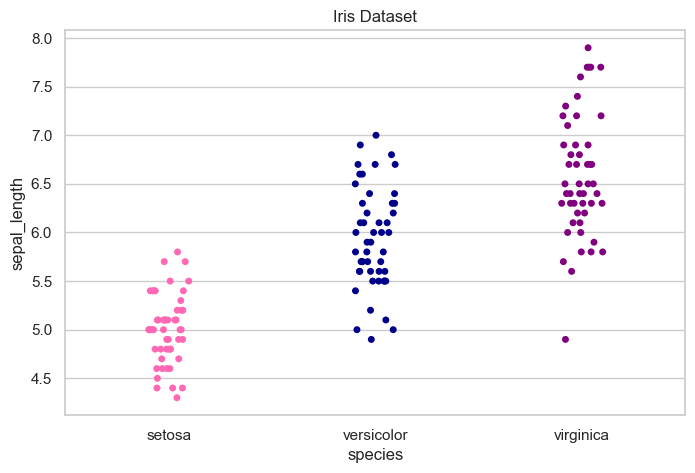

In [32]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(8, 5))
iris = sns.load_dataset('iris')
colors = ["hotpink", "#00008B", "#800080"]
ax = sns.stripplot(x ='species',y = 'sepal_length',data = iris, palette=colors)
plt.title('Iris Dataset')
plt.show()

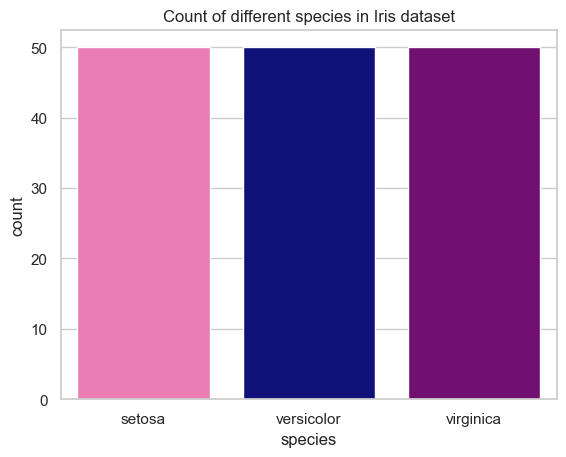

In [33]:
# Count plot
sns.countplot(x='species', data=iris, palette=colors)
plt.title("Count of different species in Iris dataset")
plt.show()

### Finding the optimum number of clusters using k-means clustering
### Two methods can be useful to find k in k-means.

### 1.The Elbow Method: Elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters’ centroids.
### 2.The Silhouette Method: The range of the Silhouette value is between +1 and -1. A high value is desirable and indicates that the point is placed in the correct cluster. If many points have a negative Silhouette value, it may indicate that we have created too many or too few clusters.

### 1. The Elbow Method

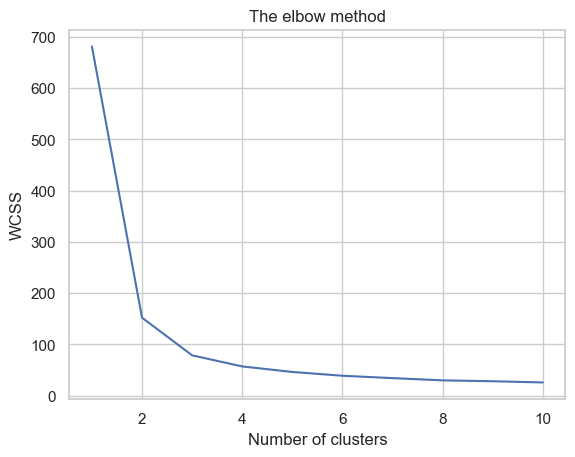

In [40]:
# Finding the optimum number of clusters for k-means classification

iris_data = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

### We can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

### 2.The Silhouette Method

In [44]:
from sklearn.metrics import silhouette_score
sil = []
# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k).fit(iris_data)
    labels = kmeans.labels_
    sil.append(silhouette_score(iris_data, labels, metric = 'euclidean'))
print(sil)

[0.6810461692117462, 0.5528190123564095, 0.49805050499728737, 0.48874888709310566, 0.3557536089245232, 0.3588294450965685, 0.34284829444316633, 0.34391034474818916, 0.3069162766838072]


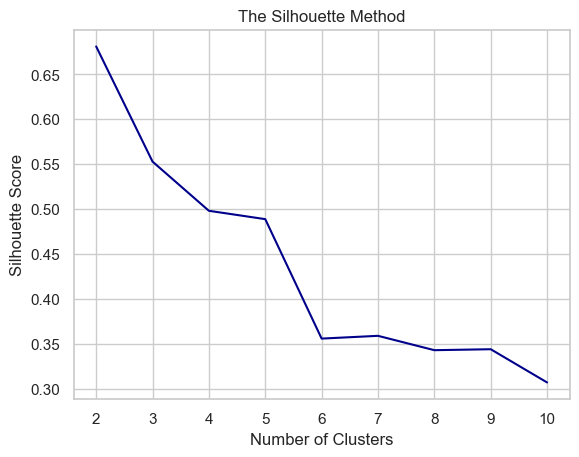

In [45]:
plt.plot(range(2, 11), sil,color="#00008B")
plt.title('The Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

### From the Silhouette Methdos we can see the Max Score 3. So we choose 3 as the optimal number of clusters.

### Initializing K-Means With Optimum Number Of Clusters

In [46]:
# From the above elbow we choose the number of clusters as ** '3**'
# Creating K-Means Classifier
kmeans = KMeans(n_clusters = 3,init = 'k-means++',
               max_iter = 300,n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

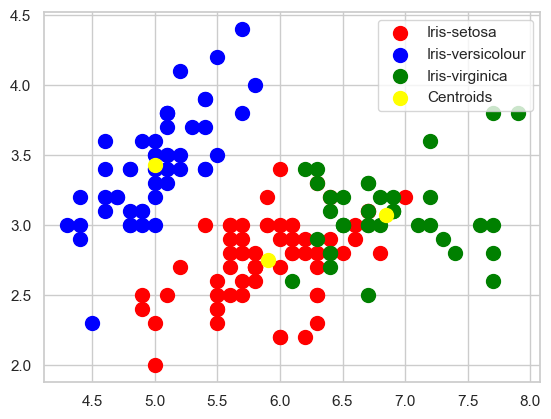

In [47]:
# Visualizing the clusters on the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
           s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
           s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
           s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

### From the scatter plot above the optimum no of clusters are clearly evident.

#### In interpreting the scatter plot, the optimal number of clusters becomes apparent. It's important to note that the Elbow Method serves as a decision guideline, indicating a point where the rate of change in variance within clusters starts to slow down. On the other hand, the Silhouette Method is a validation metric that quantifies the goodness of clustering based on how well-defined the clusters are.Rather than viewing the Elbow Method and Silhouette Method as mutually exclusive, they complement each other in the decision-making process. The Elbow Method provides a general sense of where the 'elbow' or optimal point might be, while the Silhouette Method validates the quality of the clusters at different candidate cluster numbers. Together, they form a more comprehensive approach, aiding in a more confident determination of the optimal number of clusters in k-means clustering